In [3]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import matplotlib.pyplot as plt
from matplotlib_sankey import sankey

TypeError: sankey() got an unexpected keyword argument 'data'

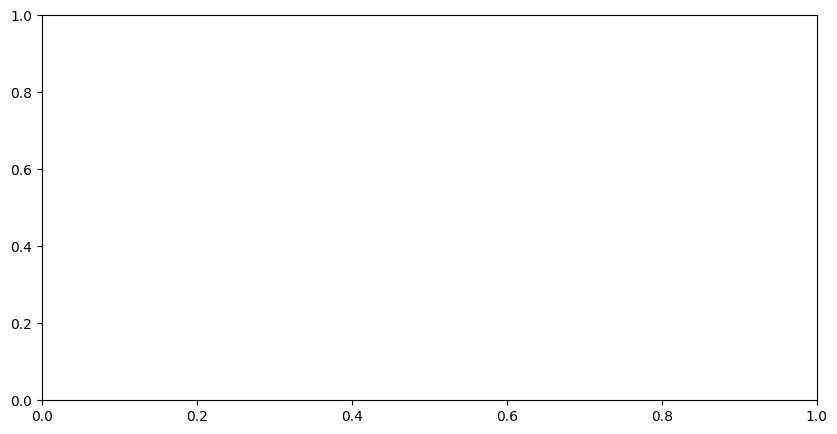

In [5]:
data = [
    [(0, 2, 20), (0, 1, 10), (3, 4, 15), (3, 2, 10), (5, 1, 5), (5, 2, 50)],
    [(2, 6, 40), (1, 6, 15), (2, 7, 40), (4, 6, 15)],
    [(7, 8, 5), (7, 9, 5), (7, 10, 20), (7, 11, 10), (6, 11, 55), (6, 8, 15)],
]

fig, ax = plt.subplots(figsize=(10, 5))
sankey(
    data=data,
    cmap="tab20",
    annotate_columns=True,
    ax=ax,
)